#### Rank should not be guessed !
#### This is an Attempt to find the underlying weight rank of the final layer weight of the Nomic Model

#### We are going to implement the Singular Value Decomposition (SVD)

**The Concept of SVD**   
is that you can take a Data Matrix X and write it as the product of U , V^Transpose and Sigma(also known as Singular diagonal representation).    

**U**: contains information about the *column* space of X.   

**V**: contains information about the *row* space of X.    

**Sigma(Singular)**: is the diagonal matrix that tells you how important the various columns of U and V are in the Matrix space.

#### Install sentence transformers

In [3]:
!pip install sentence-transformers

#### Login to Hugging Face

In [11]:
from huggingface_hub import notebook_login

notebook_login()

### The Nomic Model Architecture Weights from the HF 

In [5]:
from sentence_transformers import SentenceTransformer

# Load the SentenceTransformer model
model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)

# Print the model summary
print(model)

<All keys matched successfully>


SentenceTransformer(
  (0): Transformer({'max_seq_length': 8192, 'do_lower_case': False}) with Transformer model: NomicBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)


#### The Transformer

In [10]:
from sentence_transformers import SentenceTransformer
import torch

# Load the SentenceTransformer model
model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)

# Access the transformer model at index 0
transformer_model = model[0]

print(transformer_model) 

<All keys matched successfully>


Transformer({'max_seq_length': 8192, 'do_lower_case': False}) with Transformer model: NomicBertModel 


#### What are the keys from the saved pytorch_model.bin 

In [18]:
import torch

# Load the model state dictionary from the saved file
state_dict_path = 'pytorch_model.bin'
state_dict = torch.load(state_dict_path, map_location=torch.device('cpu'))  # Use 'cuda' if working with GPUs

# Display the keys of the state dictionary
print("Keys in the State Dictionary:")
for key in state_dict.keys():
    print(key)

Keys in the State Dictionary:
embeddings.word_embeddings.weight
embeddings.token_type_embeddings.weight
emb_ln.weight
emb_ln.bias
encoder.layers.0.attn.Wqkv.weight
encoder.layers.0.attn.out_proj.weight
encoder.layers.0.mlp.fc11.weight
encoder.layers.0.mlp.fc12.weight
encoder.layers.0.mlp.fc2.weight
encoder.layers.0.norm1.weight
encoder.layers.0.norm1.bias
encoder.layers.0.norm2.weight
encoder.layers.0.norm2.bias
encoder.layers.1.attn.Wqkv.weight
encoder.layers.1.attn.out_proj.weight
encoder.layers.1.mlp.fc11.weight
encoder.layers.1.mlp.fc12.weight
encoder.layers.1.mlp.fc2.weight
encoder.layers.1.norm1.weight
encoder.layers.1.norm1.bias
encoder.layers.1.norm2.weight
encoder.layers.1.norm2.bias
encoder.layers.2.attn.Wqkv.weight
encoder.layers.2.attn.out_proj.weight
encoder.layers.2.mlp.fc11.weight
encoder.layers.2.mlp.fc12.weight
encoder.layers.2.mlp.fc2.weight
encoder.layers.2.norm1.weight
encoder.layers.2.norm1.bias
encoder.layers.2.norm2.weight
encoder.layers.2.norm2.bias
encoder.laye

#### Get the Weight of Q , K and V only

In [54]:
import torch

# Load the model state dictionary from the saved file
state_dict_path = 'pytorch_model.bin'
state_dict = torch.load(state_dict_path, map_location=torch.device('cpu'))  # Use 'cuda' if working with GPUs

# Access the tensor values
attention_weights_path = 'encoder.layers.0.attn.Wqkv.weight'

attention_weights = state_dict[attention_weights_path].numpy()

# Print or use the attention weights as needed
print("Attention Weights Shape:", attention_weights.shape)
print("Attention Weights Values:")
print(attention_weights)

Attention Weights Shape: (2304, 768)
Attention Weights Values:
[[ 0.01573352 -0.03501476  0.13139637 ...  0.00114455  0.04868046
  -0.00808049]
 [-0.03579997 -0.02102448 -0.02301262 ...  0.01590857  0.047011
  -0.0225201 ]
 [-0.01748341  0.02885379  0.08856336 ...  0.03213291  0.06277885
   0.18849929]
 ...
 [-0.02394024  0.00391699  0.01369741 ... -0.01331637 -0.0469534
  -0.01761598]
 [-0.01782798 -0.01087678 -0.01345075 ... -0.03534149  0.02667486
  -0.03697123]
 [ 0.06087184  0.07123372  0.05338645 ...  0.01635317  0.12021493
  -0.01193718]]


#### Perform Single Value Decomposition SVD on the Weight Matrix

In [55]:
import numpy as np
from scipy.linalg import svd
from numpy.linalg import matrix_rank

"""
Singular Value Decomposition
""" 
print("Rank =", matrix_rank(attention_weights))

# Perform SVD
U, singular, V_transpose = svd(attention_weights)

print("Singular diagonal array", singular)
print(singular.shape)
print("\nU:  ", U)
print("\nV^{T}", V_transpose)

Rank = 768
Singular diagonal array [21.291609    7.2906504   6.295702    5.926835    5.606541    5.4022846
  5.129941    4.966805    4.8254666   4.6501584   4.584654    4.550474
  4.485819    4.463848    4.4154477   4.3088546   4.2437196   4.228684
  4.1881223   4.1419306   4.1317883   4.0936146   4.0714784   4.024494
  4.021481    3.992433    3.9630268   3.9503589   3.9146698   3.8939543
  3.8737361   3.8486328   3.8285377   3.8130388   3.7776365   3.7640383
  3.7448125   3.7315776   3.717846    3.6975162   3.6728103   3.6498733
  3.630714    3.6140862   3.5849533   3.570213    3.5688396   3.5529945
  3.54146     3.5185325   3.5138905   3.4956114   3.4940488   3.4739535
  3.4498706   3.444917    3.4378717   3.4220216   3.4120672   3.4008014
  3.3847136   3.3793266   3.3691442   3.3680167   3.3547423   3.347746
  3.336747    3.3295827   3.3176181   3.311112    3.2990878   3.2866783
  3.2849445   3.2762346   3.2673643   3.2611105   3.2460043   3.2430546
  3.2311199   3.2204225   3.21339

#### Let us see them in descending line graph to see the cut-off rank

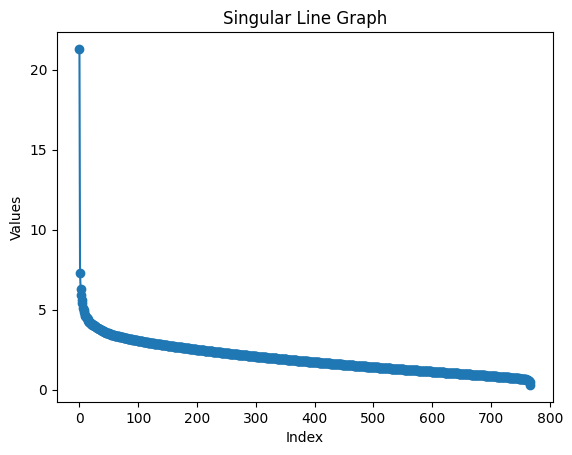

In [56]:
import numpy as np
import matplotlib.pyplot as plt 

# Singular is a Sorted numpy array in descending order 

# Plot the line graph
plt.plot(singular, marker='o')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Singular Line Graph')

# Show the plot
plt.show()

### We will visualize this for all the Ten Weight Matrices now

#### Load the Full-Model **[Nomic Full-Model on Hagging Face](https://huggingface.co/nomic-ai/nomic-embed-text-v1/blob/main/pytorch_model.bin)**

In [18]:
import torch

# Load the model state dictionary from the saved file
state_dict_path = 'pytorch_model.bin'
state_dict = torch.load(state_dict_path, map_location=torch.device('cpu'))  # Use 'cuda' if working with GPUs

# Init for storing the list of cut-off
truncated_singular_indicies = []

#### The SVD function

In [2]:
import numpy as np
from scipy.linalg import svd
from numpy.linalg import matrix_rank

def attention_svd(attention_weights=None, truncate=False, truncate_percentage=0.1 ):
    """
    Singular Value Decomposition
    """ 
    if attention_weights is None:
        print("No Attention Weight Found !")
        return -1
    
    print("The Rank is ", matrix_rank(attention_weights))

    # Perform SVD
    U, singular, V_transpose = svd(attention_weights)
    
    if truncate:
        # Find the threshold value (10% of the maximum value is the default)
        threshold = truncate_percentage * np.max(singular)

        # Filter values greater than or equal to the threshold
        singular = singular[singular >= threshold]
        
        # Store the new Aggregator 
        truncated_singular_indicies.append(len(singular)) 
        
        print("The Singular cut-off index is ", len(singular))
        
        

    return singular

#### Return the Attention Weights Matrix for a given Layer and perform SVD

In [3]:
import torch

def extract_svd_attention_weight(layer_number = 0 , truncate = False , truncate_percentage = 0.1):
    print(f"Processing layer : {layer_number}")
    # Access the tensor values
    attention_weights_path = f'encoder.layers.{layer_number}.attn.Wqkv.weight'
    attention_weights = state_dict[attention_weights_path].numpy()
    print(f"Attention Weights Shape for layer {layer_number}:", attention_weights.shape)    
    
    # Calculate the SVD of the attention matrix
    singular  = attention_svd(attention_weights, truncate, truncate_percentage)
    
    print(f"Attention Weights SVD for layer {layer_number} completed")
    
    return singular 

#### Plot the SVD Line graphs Without Truncating

In [4]:
# Wqkv Layers of the Nomic Model 10 unique values
wqkv_layers = list(range(11))
wqkv_layers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Processing layer : 0
Attention Weights Shape for layer 0: (2304, 768)
The Rank is  768
Attention Weights SVD for layer 0 completed


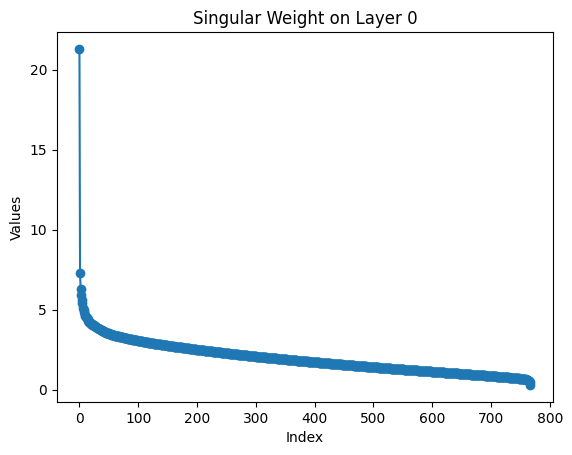

Processing layer : 1
Attention Weights Shape for layer 1: (2304, 768)
The Rank is  768
Attention Weights SVD for layer 1 completed


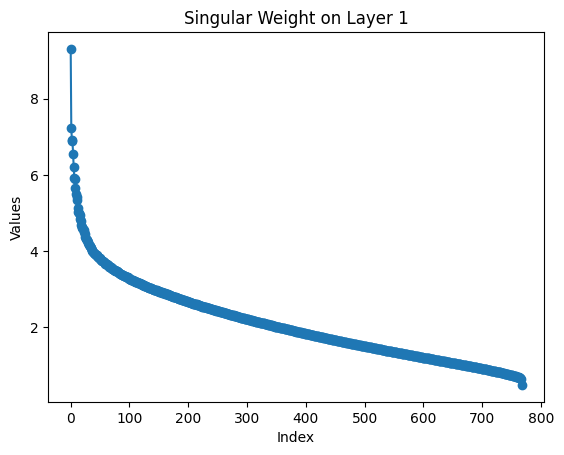

Processing layer : 2
Attention Weights Shape for layer 2: (2304, 768)
The Rank is  768
Attention Weights SVD for layer 2 completed


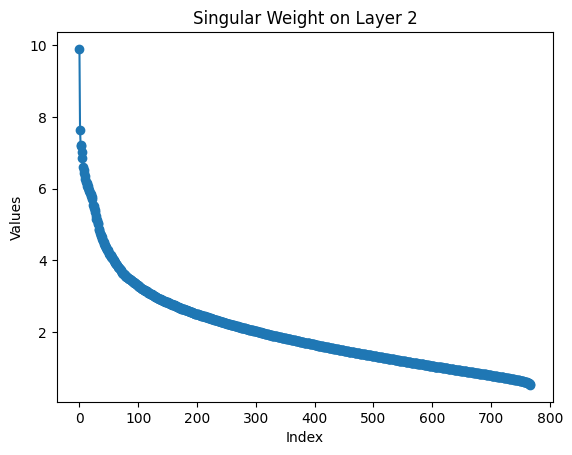

Processing layer : 3
Attention Weights Shape for layer 3: (2304, 768)
The Rank is  768
Attention Weights SVD for layer 3 completed


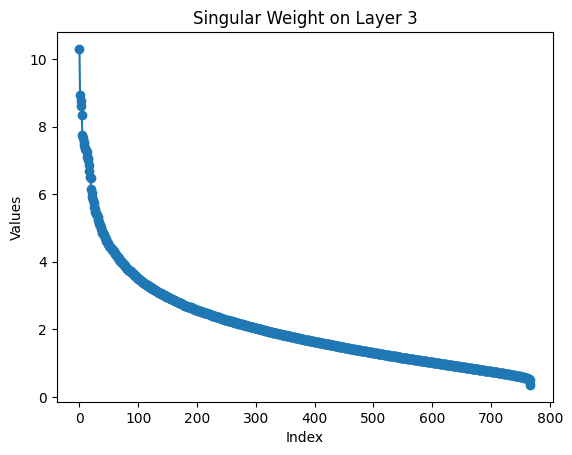

Processing layer : 4
Attention Weights Shape for layer 4: (2304, 768)
The Rank is  768
Attention Weights SVD for layer 4 completed


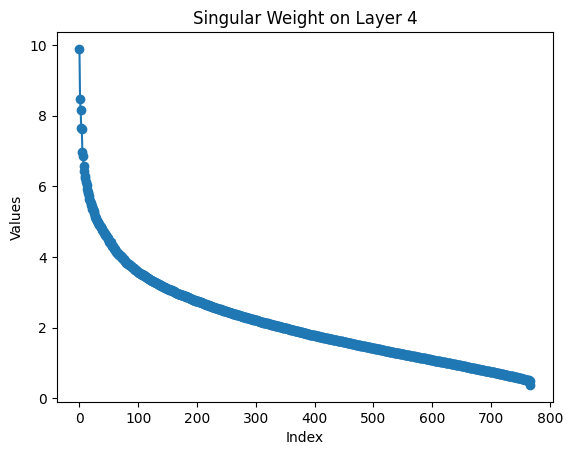

Processing layer : 5
Attention Weights Shape for layer 5: (2304, 768)
The Rank is  768
Attention Weights SVD for layer 5 completed


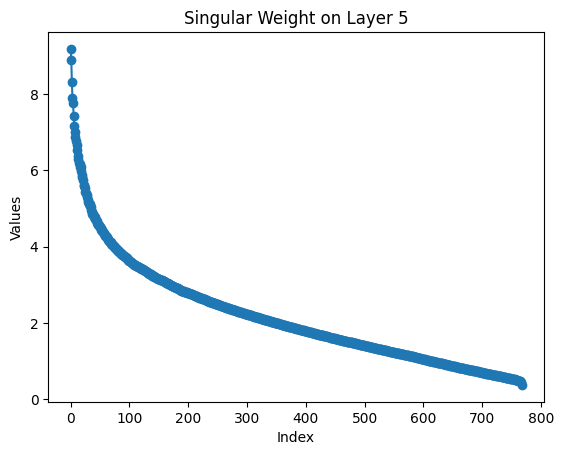

Processing layer : 6
Attention Weights Shape for layer 6: (2304, 768)
The Rank is  768
Attention Weights SVD for layer 6 completed


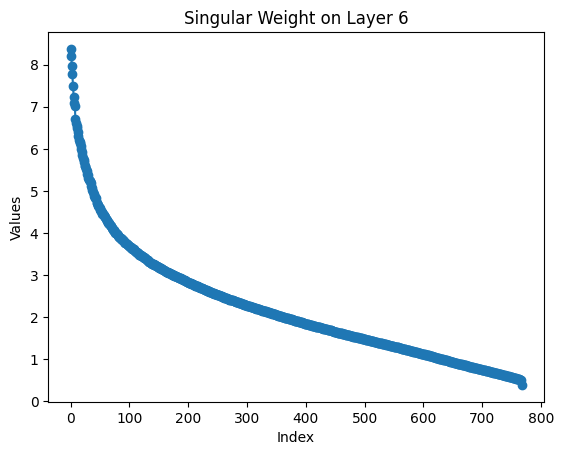

Processing layer : 7
Attention Weights Shape for layer 7: (2304, 768)
The Rank is  768
Attention Weights SVD for layer 7 completed


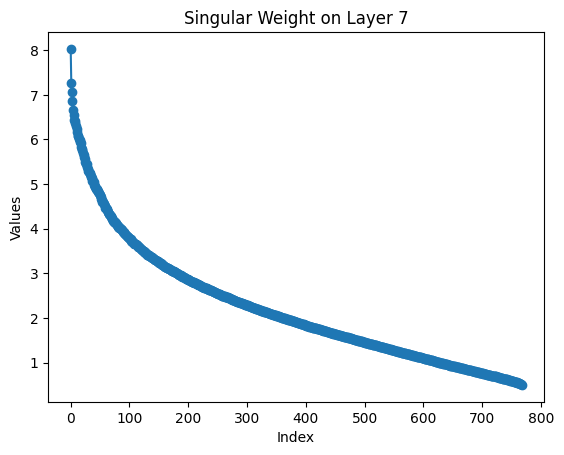

Processing layer : 8
Attention Weights Shape for layer 8: (2304, 768)
The Rank is  768
Attention Weights SVD for layer 8 completed


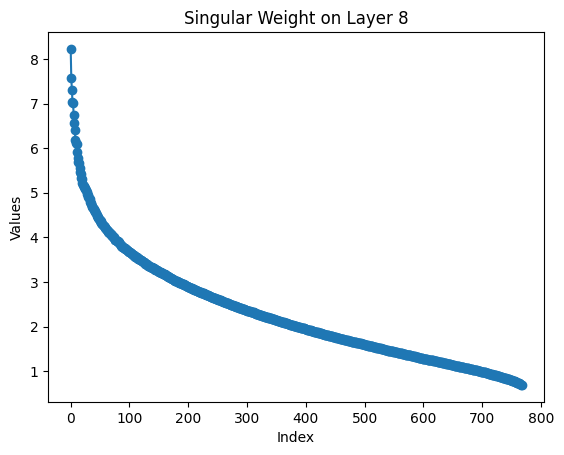

Processing layer : 9
Attention Weights Shape for layer 9: (2304, 768)
The Rank is  768
Attention Weights SVD for layer 9 completed


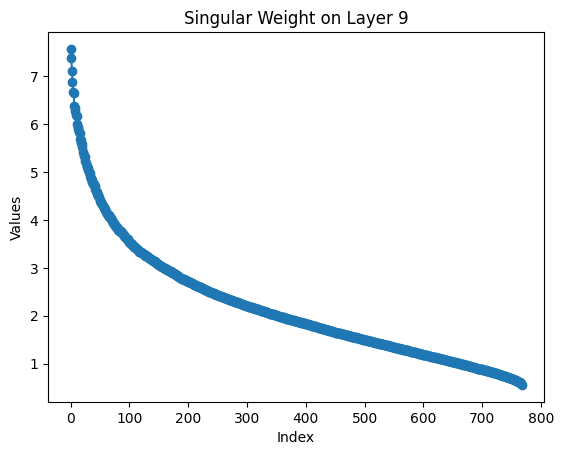

Processing layer : 10
Attention Weights Shape for layer 10: (2304, 768)
The Rank is  768
Attention Weights SVD for layer 10 completed


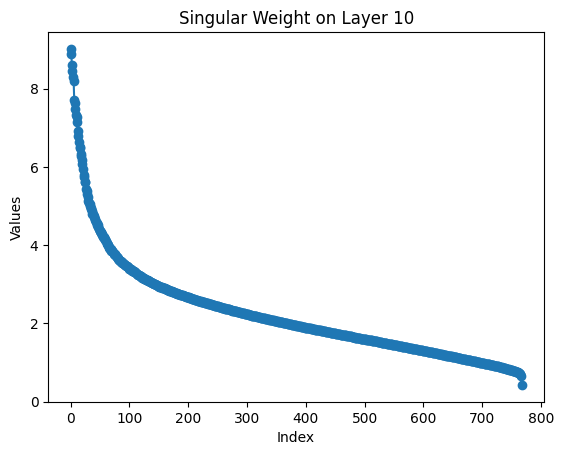

In [5]:
import numpy as np
import matplotlib.pyplot as plt

for value in wqkv_layers:
    # Extract the Attention Weights for the Layer and
    # Assuming 'singular' is a sorted numpy array in descending order process
    singular = extract_svd_attention_weight(layer_number = value , truncate = False)
 
    # Plot the line graph
    plt.plot(singular, marker='o')

    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'Singular Weight on Layer {int(value)}')

    # Show the plot
    plt.show()

#### Plot the SVD Line graphs With Truncating

Processing layer : 0
Attention Weights Shape for layer 0: (2304, 768)
The Rank is  768
The Singular cut-off index is  1
Attention Weights SVD for layer 0 completed


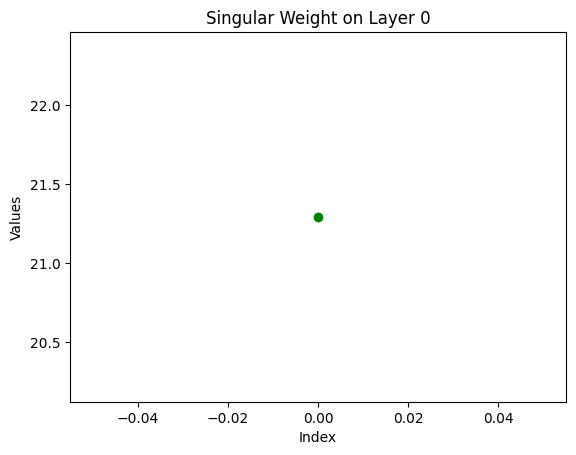

Processing layer : 1
Attention Weights Shape for layer 1: (2304, 768)
The Rank is  768
The Singular cut-off index is  5
Attention Weights SVD for layer 1 completed


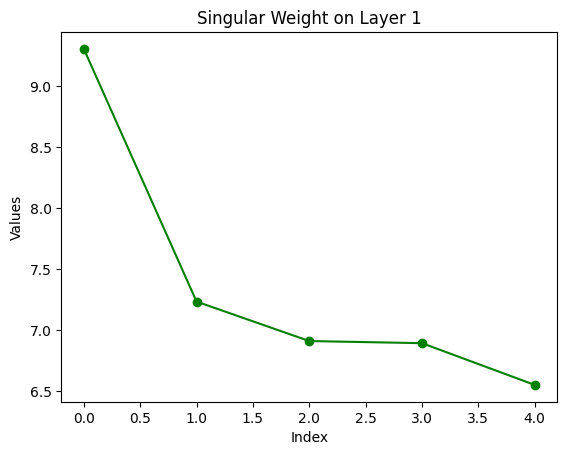

Processing layer : 2
Attention Weights Shape for layer 2: (2304, 768)
The Rank is  768
The Singular cut-off index is  5
Attention Weights SVD for layer 2 completed


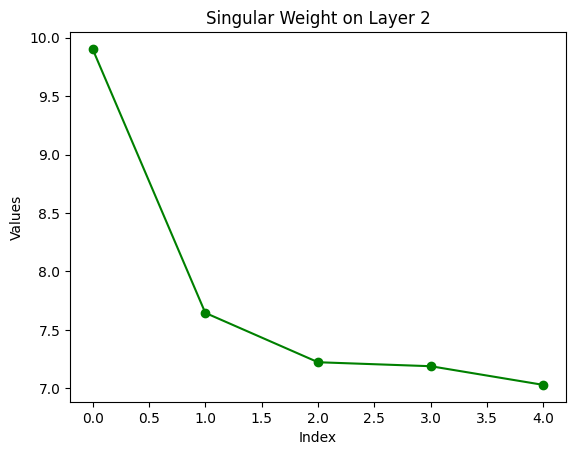

Processing layer : 3
Attention Weights Shape for layer 3: (2304, 768)
The Rank is  768
The Singular cut-off index is  13
Attention Weights SVD for layer 3 completed


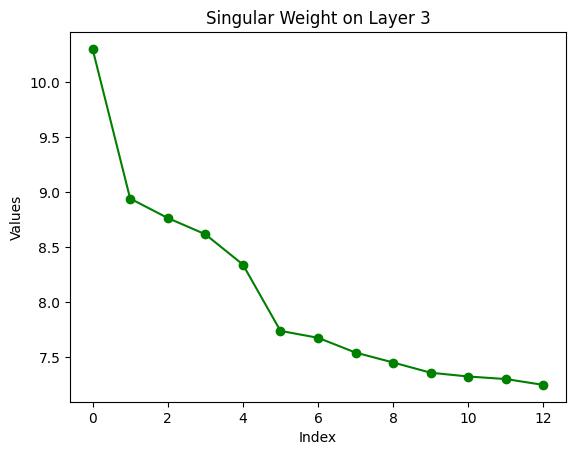

Processing layer : 4
Attention Weights Shape for layer 4: (2304, 768)
The Rank is  768
The Singular cut-off index is  6
Attention Weights SVD for layer 4 completed


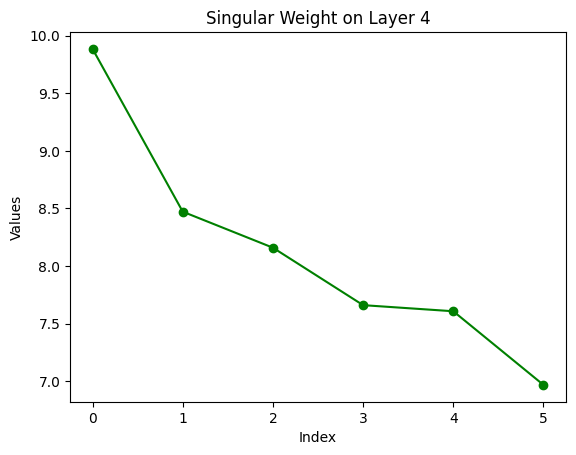

Processing layer : 5
Attention Weights Shape for layer 5: (2304, 768)
The Rank is  768
The Singular cut-off index is  12
Attention Weights SVD for layer 5 completed


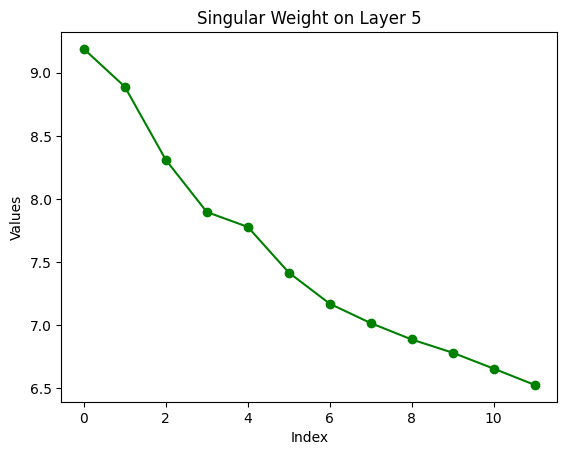

Processing layer : 6
Attention Weights Shape for layer 6: (2304, 768)
The Rank is  768
The Singular cut-off index is  20
Attention Weights SVD for layer 6 completed


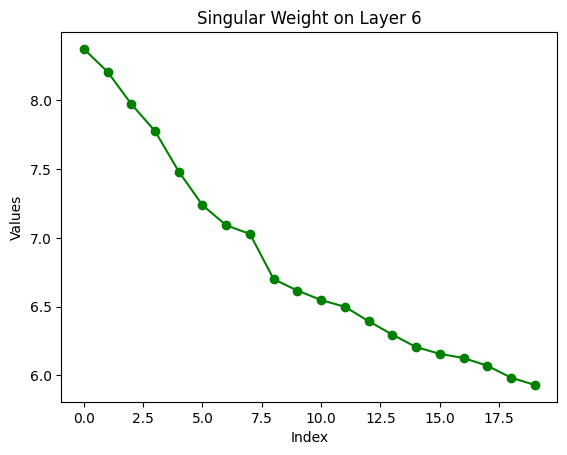

Processing layer : 7
Attention Weights Shape for layer 7: (2304, 768)
The Rank is  768
The Singular cut-off index is  23
Attention Weights SVD for layer 7 completed


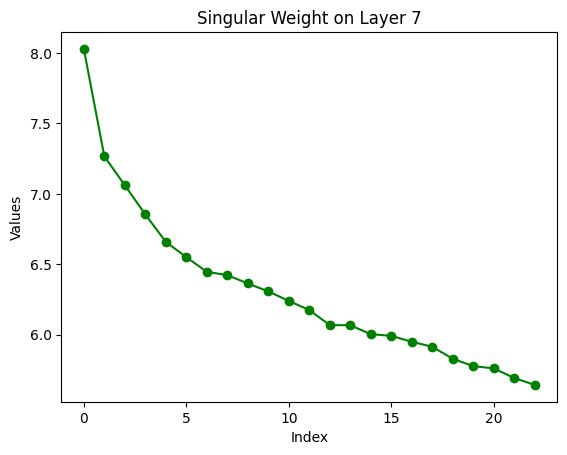

Processing layer : 8
Attention Weights Shape for layer 8: (2304, 768)
The Rank is  768
The Singular cut-off index is  13
Attention Weights SVD for layer 8 completed


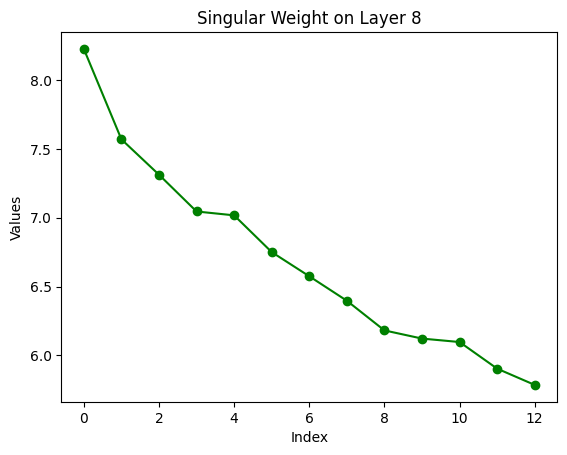

Processing layer : 9
Attention Weights Shape for layer 9: (2304, 768)
The Rank is  768
The Singular cut-off index is  25
Attention Weights SVD for layer 9 completed


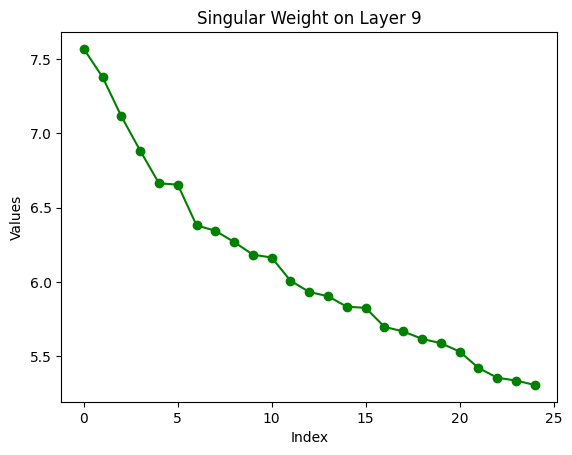

Processing layer : 10
Attention Weights Shape for layer 10: (2304, 768)
The Rank is  768
The Singular cut-off index is  18
Attention Weights SVD for layer 10 completed


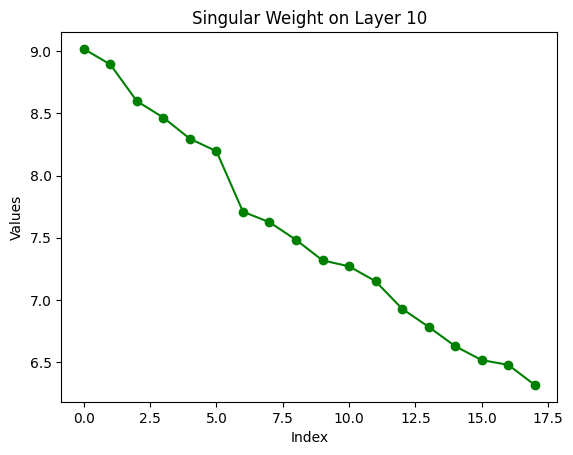

In [19]:
import numpy as np
import matplotlib.pyplot as plt

for value in wqkv_layers:
    # Extract the Attention Weights for the Layer and
    # Assuming 'singular' is a sorted numpy array in descending order process
    singular = extract_svd_attention_weight(layer_number = value , truncate = True, truncate_percentage = 0.7)
 
    # Plot the line graph
    plt.plot(singular, marker='o', color='green')

    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'Singular Weight on Layer {int(value)}')

    # Show the plot
    plt.show()

#### Average of the Truncated Values with 70% Truncation gives the Rank to use
#### (feel free to change the percentage value)

In [20]:
truncated_singular_indicies

[1, 5, 5, 13, 6, 12, 20, 23, 13, 25, 18]

In [21]:
aggregator = 0
for value in truncated_singular_indicies: 
    aggregator += value

# Return the average 
print(aggregator / len(truncated_singular_indicies))

12.818181818181818
